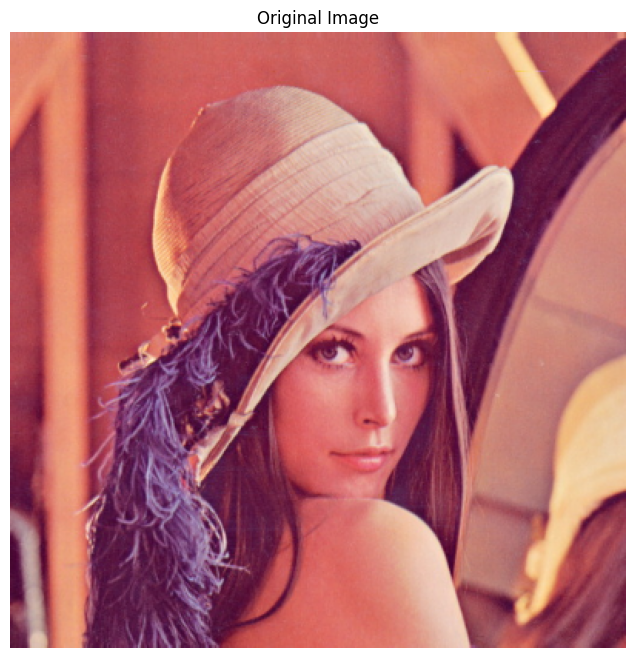

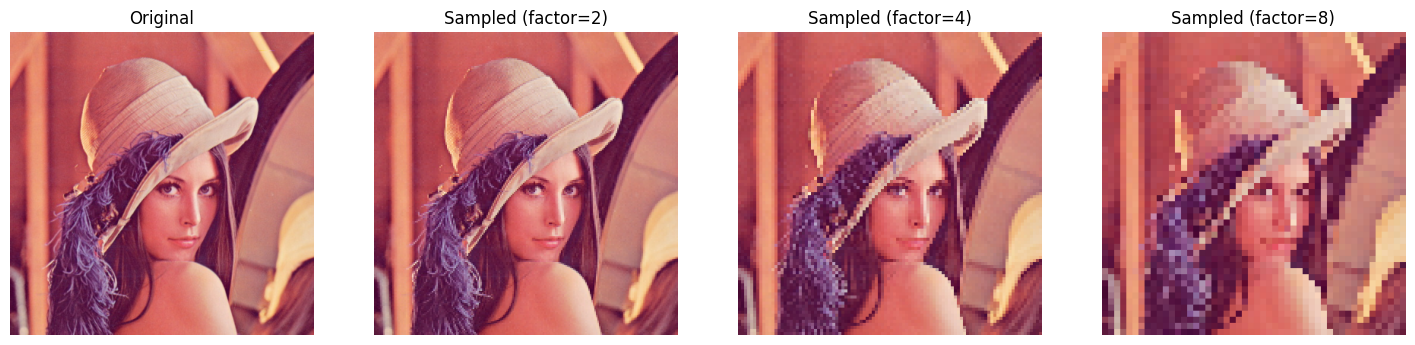

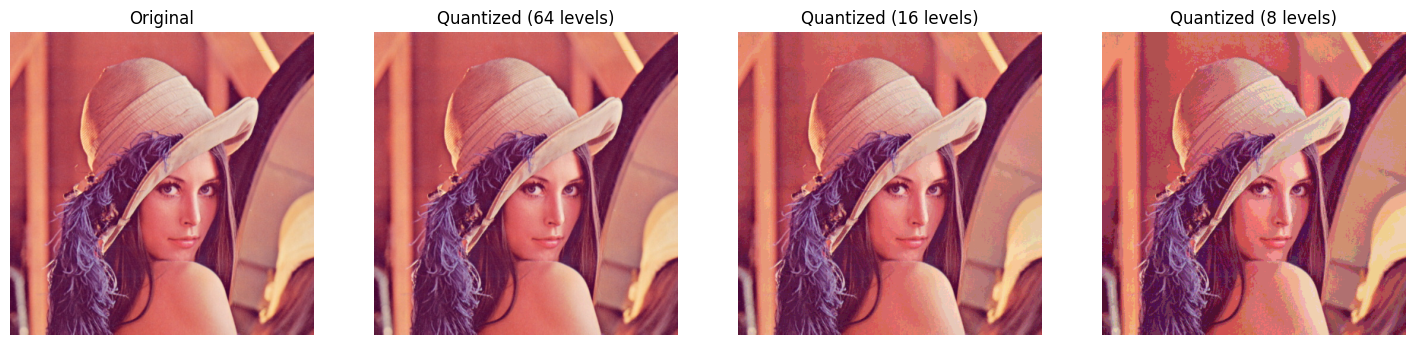

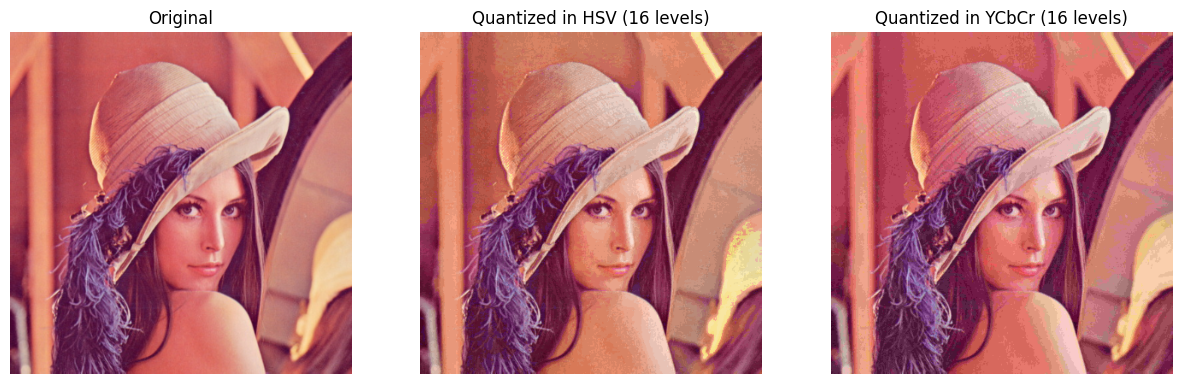

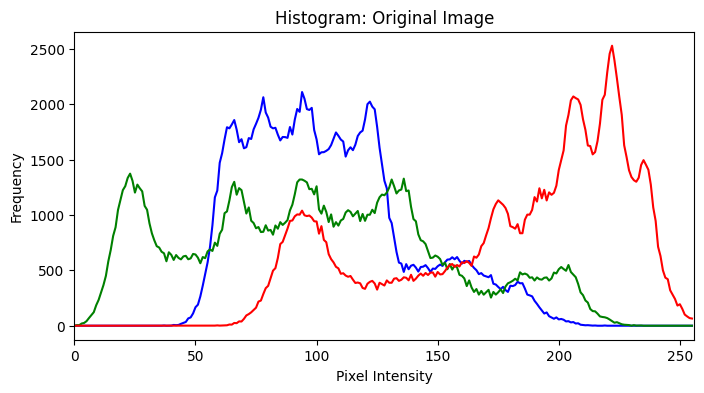

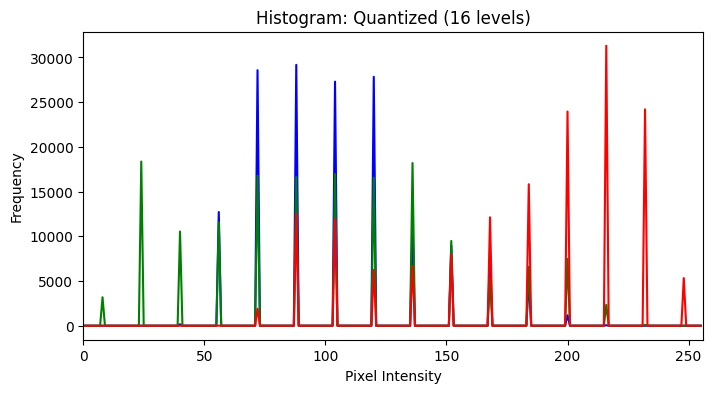

Original Image Shape: (400, 400, 3)
Unique Colors in Original: 91084
Unique Colors after Quantization (RGB, 16 levels): 408
Unique Colors after Quantization (RGB, 8 levels): 92


In [1]:
# ============================================
# Assignment: Image Sampling & Quantization
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Function: Sampling
# -------------------------
def image_sampling(img, factor):
    """Reduce resolution by sampling every k-th pixel"""
    sampled = img[::factor, ::factor]
    return cv2.resize(sampled, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

# -------------------------
# Function: Quantization
# -------------------------
def image_quantization(img, levels):
    """Quantize image into L levels per channel"""
    step = 256 // levels
    quantized = (img // step) * step + step // 2
    return quantized.astype(np.uint8)

# -------------------------
# Helper: Show images
# -------------------------
def show_images(images, titles, rows=1, cols=3, figsize=(15,8)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        if len(img.shape) == 2:  # grayscale
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

# -------------------------
# Load Sample Image (No Upload Needed)
# -------------------------
# OpenCV provides sample images; here we use "lena" from online source
import urllib.request
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
urllib.request.urlretrieve(url, "sample.jpg")

img = cv2.imread("sample.jpg")
img = cv2.resize(img, (400, 400))  # resize for easy processing

# Show Original
show_images([img], ["Original Image"], 1, 1)

# -------------------------
# Sampling demonstration
# -------------------------
sampled_2 = image_sampling(img, 2)  # factor 2
sampled_4 = image_sampling(img, 4)  # factor 4
sampled_8 = image_sampling(img, 8)  # factor 8

show_images(
    [img, sampled_2, sampled_4, sampled_8],
    ["Original", "Sampled (factor=2)", "Sampled (factor=4)", "Sampled (factor=8)"],
    1, 4, (18,6)
)

# -------------------------
# Quantization (RGB)
# -------------------------
quant_64 = image_quantization(img, 64)   # 64 levels
quant_16 = image_quantization(img, 16)   # 16 levels
quant_8  = image_quantization(img, 8)    # 8 levels

show_images(
    [img, quant_64, quant_16, quant_8],
    ["Original", "Quantized (64 levels)", "Quantized (16 levels)", "Quantized (8 levels)"],
    1, 4, (18,6)
)

# -------------------------
# Quantization in HSV
# -------------------------
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv_quant = image_quantization(hsv, 16)
hsv_recon = cv2.cvtColor(hsv_quant, cv2.COLOR_HSV2BGR)

# -------------------------
# Quantization in YCbCr
# -------------------------
ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
ycbcr_quant = image_quantization(ycbcr, 16)
ycbcr_recon = cv2.cvtColor(ycbcr_quant, cv2.COLOR_YCrCb2BGR)

show_images(
    [img, hsv_recon, ycbcr_recon],
    ["Original", "Quantized in HSV (16 levels)", "Quantized in YCbCr (16 levels)"],
    1, 3, (15,6)
)

# -------------------------
# Histogram Comparison
# -------------------------
def plot_histogram(img, title):
    colors = ('b','g','r')
    plt.figure(figsize=(8,4))
    for i, col in enumerate(colors):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(img, "Histogram: Original Image")
plot_histogram(quant_16, "Histogram: Quantized (16 levels)")

# -------------------------
# Print Analysis Info
# -------------------------
print("Original Image Shape:", img.shape)
print("Unique Colors in Original:", len(np.unique(img.reshape(-1, 3), axis=0)))
print("Unique Colors after Quantization (RGB, 16 levels):", len(np.unique(quant_16.reshape(-1, 3), axis=0)))
print("Unique Colors after Quantization (RGB, 8 levels):", len(np.unique(quant_8.reshape(-1, 3), axis=0)))
